In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns

In [ ]:
from typing import Tuple

The goal of this notebook is to deepen my understanding of two fundamental classification algorithms: K-Nearest Neighbors (KNN) and Logistic Regression. I will implement the algorithms from scratch (i.e., without using machine learning libraries like scikit-learn) and apply them to a real-life dataset.

**Dataset Description**

I will use the Pima Indians Diabetes Dataset, which is available from Kaggle. This dataset consists of medical diagnostic measurements to predict whether a patient has diabetes.

Number of Instances: 768.
Number of Attributes: 8 predictive features and 1 target variable.
Predictive Features:  

* Number of times pregnant  
* Plasma glucose concentration  
* Diastolic blood pressure (mm Hg)  
* Triceps skinfold thickness (mm)  
* 2-Hour serum insulin (mu U/ml)  
* Body mass index (weight in kg/(height in m)^2)  
* Diabetes pedigree function  
* Age (Categorical)

Target Variable:  
0: Non-diabetic  
1: Diabetic.

In [ ]:
# Defining the helper function to evaluate the model

def evaluate_model(true_labels, predicted_labels):
    """Evaluates the model using various metrics.

    Args:
        true_labels (numpy.ndarray): The true class labels.
        predicted_labels (numpy.ndarray): The predicted class labels.

    Returns:
        dict: A dictionary containing evaluation metrics.
    """
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

    cm = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    metrics = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    return metrics

## Data Loading and Preprocessing

Load the Dataset: Read the dataset into your program.  
Data Cleaning: Check for missing values or anomalies and handle them appropriately.  
Feature Scaling: Apply feature scaling (normalization or standardization) to the dataset.  
Train-Test Split: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).  


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,age_new
0,6,148.0,72.0,35.0,NaN,33.6,0.627,1,Middle
1,1,85.0,66.0,29.0,NaN,26.6,0.351,0,Young
2,8,183.0,64.0,NaN,NaN,23.3,0.672,1,Young
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,Young
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,Young


In [ ]:
# Checking for duplicates. They could skew my model
duplicates = diabetes.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
#----------------------------------------------------------------------------------------
# I decided to first do some data cleaning (deal with missing values).
# Then, I will split my dataset into train and test sets.
# And only then will I finish data cleaning and do feature scaling.
# I am doing this specifically as to prevent data leakage.
# If I did feature scaling on the entire dataset, and only then splitted my dataset
# into train and test sets, my train set will have some knowledge about the test set too!
# Which could lead to a false good performance.
#----------------------------------------------------------------------------------------

diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Outcome,0
age_new,0


In [ ]:
# dropping the entire Insulin column because it has around half missing values!
diabetes.drop('Insulin', axis='columns', inplace=True)

In [ ]:
# dropping the few rows where Glucose, BMI, or BloodPressure is missing
diabetes.dropna(subset=['Glucose', 'BMI', 'BloodPressure'], inplace=True)
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,192
BMI,0
DiabetesPedigreeFunction,0
Outcome,0
age_new,0


I only dropped about 5% of the entire dataset in the previous step, so I think that's is ok. However, there are still ~26% of missing values for SkinThickness. I will impute them with the median. But I will do so only after I split the dataset into train and test to prevent data leakage!

In [ ]:
# create train test split
X = diabetes[[x for x in diabetes.columns if x!='Outcome']]
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# reset indices for all train and test subsets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
train_median_value = X_train['SkinThickness'].median()
test_median_value = X_test['SkinThickness'].median()

X_train['SkinThickness'].fillna(train_median_value, inplace=True)
X_test['SkinThickness'].fillna(test_median_value, inplace=True)

<ipython-input-13-158fa2fe711c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['SkinThickness'].fillna(train_median_value, inplace=True)
<ipython-input-13-158fa2fe711c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
X_train.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
age_new,0


In [ ]:
X_test.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
age_new,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cat_features = ["age_new"]
num_features = X.columns.tolist()
num_features.remove("age_new")

# I have read on the Internet that for some reason normalizing a dataset
# will make KNN perform better, while standardizing a dataset will make
# Logistic Regression do better. I thought it was interesting, so I wanted to try it out.

min_max_scaler  = MinMaxScaler()
standard_scaler = StandardScaler()

# will be used for KNN
X_train_normalized_numeric = pd.DataFrame(min_max_scaler.fit_transform(X_train[num_features]), columns=num_features)
X_test_normalized_numeric  = pd.DataFrame(min_max_scaler.transform(X_test[num_features]), columns=num_features)

X_train_normalized = pd.concat([X_train_normalized_numeric, X_train.drop(num_features, axis=1)], axis=1)
X_test_normalized  = pd.concat([X_test_normalized_numeric, X_test.drop(num_features, axis=1)], axis=1)


# will be used for Logistic Regression
X_train_standardized_numeric = pd.DataFrame(standard_scaler.fit_transform(X_train[num_features]), columns=num_features)
X_test_standardized_numeric  = pd.DataFrame(standard_scaler.transform(X_test[num_features]), columns=num_features)

X_train_standardized = pd.concat([X_train_standardized_numeric, X_train.drop(num_features, axis=1)], axis=1)
X_test_standardized  = pd.concat([X_test_standardized_numeric, X_test.drop(num_features, axis=1)], axis=1)

## Implement K-Nearest Neighbors (KNN) from Scratch

Our implementation will be an improvement of the existing KNN classifier in scikit learn. KNN is scikit-learn can only handle numeric variables, but we will build one that can handle both categorical and numeric variables.


**Distance Function**


Our distance function must handle both numerical and categorical variables. Recall, from my K-Prototypes algorithm, I implemented such a function. Let's do it again.

Implement code to handle the numerical features

In [ ]:
def euclidean_distance(x: np.array, y: np.array) -> float:
    """Calculates the Euclidean distance between two points.
    Args:
        x (numpy.ndarray): The first point.
        y (numpy.ndarray): The second point.

    Returns:
        float: The Euclidean distance between the two points.
    """
    sum = 0
    for component in range(0, len(x)):
      sum += (y[component]-x[component])**2

    distance = np.sqrt(sum)
    return distance

Implement code to handle the categorical features

In [ ]:
def simple_matching_dissimilarity(x: np.array, y: np.array) -> float:
    """Calculates the simple matching dissimilarity between two categorical samples.
    Args:
        x (numpy.ndarray): the categorical features of the first sample.
        y (numpy.ndarray): the categorical features of the second sample.

    Returns:
        int: The number of mismatches between the two points.
    """
    missmatches = 0
    for i in range(0, len(x)):
      if x[i] != y[i]:
        missmatches += 1
    return missmatches

### Neighbor Identification

Define a function that finds the k-nearest neighbor's labels.

In [ ]:
def get_k_nearest_neighbors(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    test_instance: pd.DataFrame,
    k: int,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> list:
    """Finds the k nearest neighbors of a test instance.
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        test_instance (pd.DataFrame): The test instance.
        k (int): The number of neighbors to find.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): The weight to put on categorical distance

    Returns:
        list: Labels of the k nearest neighbors.
    """

    # make sure to handle cases where the data only has numeric or categorical
    # variables.

    distances_and_labels = []
    for i in range(len(X_train)):
      label = y_train.values[i] # keeping track of the corresponding label for each row

      distance = 0
      numerical_distance = 0
      categorical_distance = 0

      # if numerical features exist
      if all([col in X_train.columns for col in num_features]):
        point_num = X_train[num_features].values[i]
        numerical_distance = euclidean_distance(point_num, test_instance[num_features].values.flatten())

      # if categorical features exist
      if all([col in X_train.columns for col in cat_features]):
        point_cat = X_train[cat_features].values[i]
        categorical_distance = simple_matching_dissimilarity(point_cat, test_instance[cat_features].values.flatten())

      distances_and_labels.append([numerical_distance + gamma * categorical_distance, label])

    # The total distance must be a sum of the euclidean distance + gamma * categorical distance
    distances_and_labels.sort(key=lambda x: x[0])
    labels = [label[1] for label in distances_and_labels[:k]]
    return labels

### Prediction Function

In [ ]:
import random

def predict_classification(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    test_instance: pd.DataFrame,
    k: int,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> str:
    """Predicts the class label for a test instance by first calling get_k_nearest_neighbors
    and then taking a majority vote
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        test_instance (pd.DataFrame): The test instance.
        k (int): The number of neighbors to find.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): How much to weigh the categorical distances

    Returns:
        The predicted class label.
    """

    k_nearest_neighbors = get_k_nearest_neighbors(X_train, y_train, test_instance, k, num_features, cat_features, gamma)
    dict_counter = {}
    for label in k_nearest_neighbors:
      if label in dict_counter.keys():
        dict_counter[label] = dict_counter[label] + 1
      else:
        dict_counter[label] = 1

    # get all labels with the max count (in case of ties)
    max_count = max(dict_counter.values())
    most_frequent_labels = [label for label, count in dict_counter.items() if count == max_count]

    # choose one randomly out of the ones with the max count
    chosen_label = random.choice(most_frequent_labels)
    return chosen_label

### KNN Classifier Function

In [ ]:
def knn_classifier(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    k,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> list:
    """Classifies test data using the KNN algorithm. Iterates over all rows in
    X_test and returns the prediction for each of them
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        X_test (pd.DataFrame): The test data to classify.
        k (int): The number of neighbors to consider.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): How much to weigh the categorical distances.


    Returns:
        list: Predicted class labels for the test data.
    """

    predictions = []
    for index, test_instance in X_test.iterrows():
      predictions.append(predict_classification(
          X_train, y_train, test_instance, k, num_features, cat_features, gamma
      ))

    return predictions

In [ ]:
k = 9  # We can choose any value of k, 9 seemed to give the best result
cat_features = ["age_new"]
num_features = X.columns.tolist()
num_features.remove("age_new")

# played around with different values of gamma
gamma = 0.5
predicted_labels = knn_classifier(
    X_train_normalized, y_train, X_test_normalized, k, num_features, cat_features, gamma
)
metrics = evaluate_model(y_test, predicted_labels)

# Display the evaluation metrics
for key, value in metrics.items():
    print(f"{key}:")
    print(value)
    print()

Confusion Matrix:
[[131  28]
 [ 30  50]]

Accuracy:
0.7573221757322176

Precision:
0.6410256410256411

Recall:
0.625

F1 Score:
0.6329113924050633



## Implementing Logistic Regression

I will implement a logistic regression classifier using gradient descent. I allowed myself to use only Numpy. I will need to implement the following functions:

* Sigmoid function
* Function to compute the cost (loss) function
* Function for gradient descent optimization
* Function to make predictions
* A fit function that trains the logistic regression model

In [ ]:
#  Sigmoid function
def sigmoid(z: np.ndarray) -> np.ndarray:
    """Computes the sigmoid function.

    Args:
      z: np.ndarray, the input array.

    Returns:
      np.ndarray: The sigmoid of the input.
    """
    return 1 / (1 + np.exp(-z))

**Implementing the log-loss function**


The log-loss function is:

$$
Log-loss (J) = - \frac{1}{n} \sum_{i=1}^n [y_i ln(p_i) + (1-y_i) ln (1-p_i)]
$$
where `ln` is the natural log, and:  

$$
p_i  = \frac{1}{1 + e^{-w^TX_i}}
$$

for all $i$ from 1 to $n$, if you have $n$ training samples.

In [ ]:
# Loss function
def compute_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    """Computes the cost (loss) for logistic regression.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      w: np.ndarray, the logistic regression coefficients.

    Returns:
      float: The computed cost.
    """
    n = len(y)

    z = X @ w
    sigmoid_function = sigmoid(z)

    cost_sum = 0
    single_cost = 0
    for i in range(n):
      single_cost = y[i] * np.log(sigmoid_function[i]) + (1 - y[i]) * np.log(1 - sigmoid_function[i])
      cost_sum += single_cost
    return -(1 / n) * cost_sum

**Implement Gradient Descent**

Now we need to code gradient descent for us to be able to find $w$ that minimizes our loss function. The partial derivative of the log-loss function wrt $w$ is:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} X^T(p_i - y)
$$

In [ ]:
# Gradient descent
def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, eta: float, num_iters: int) -> Tuple[np.ndarray, np.ndarray]:
    """Performs gradient descent to optimize logistic regression. Note that the
    loop runs until n_iter, but you can also check for convergence and break
    out of the loop earlier.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      w: np.ndarray, the logistic regression coefficients.
      eta: float, the learning rate.
      num_iters: int, number of iterations.

    Returns:
      Tuple[np.ndarray, np.ndarray]: The optimized theta and the cost history.
    """
    n = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        z = X @ w
        predictions = sigmoid(z)
        error = predictions - y

        gradient = (1 / n) * (X.T @ error)
        w -= eta * gradient
        cost_history[i] = compute_cost(X, y, w)

        step_size = np.linalg.norm(gradient) * eta
        if step_size < 0.001: # i have read somewhere that 0.001 is a good minimal step size. so i hardcoded it for convergence
            cost_history = cost_history[:i+1]
            break

    return w, cost_history

Lets write the prediction function.

In [ ]:
# Predict function
def predict(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    """Predicts binary labels for input data using logistic regression.

    Args:
      X: np.ndarray, the input feature matrix.
      w: np.ndarray, the logistic regression coefficients.

    Returns:
      np.ndarray: Predicted labels (0 or 1).
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (w0)
    z = X @ w
    probabilities = sigmoid(z)
    predicted_labels = []

    for i in range(len(probabilities)):
      if probabilities[i] < 0.5:
        predicted_labels.append(0)
      else:
        predicted_labels.append(1)

    return np.array(predicted_labels)

Lets write the `fit` function

In [ ]:
# Train function
def fit(
    X: np.ndarray, y: np.ndarray, eta: float = 0.01, num_iters: int = 1000
) -> Tuple[np.ndarray, np.ndarray]:
    """Trains the logistic regression model.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      eta: float, the learning rate.
      num_iters: int, number of iterations.

    Returns:
      Tuple[np.ndarray, np.ndarray]: The optimized w and cost history.
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (w0)

    # optimize w
    logistic_regression_coefficients = np.zeros(X.shape[1])
    w, cost_history = gradient_descent(X, y, logistic_regression_coefficients, eta, num_iters)

    return w, cost_history

### Applying Logistic Regression

Let's use the above defined Logistic regression functions to predict `Outcome` in the diabetes dataset.

Since logistic regression does not allow categorical variables, we need to create dummy variables for `age_new`.

In [ ]:
# Train the logistic regression model
eta = 0.01
num_iters = 1000

X_train_with_dummies = pd.get_dummies(X_train_standardized, columns=['age_new'], drop_first=True, dtype = int)
X_test_with_dummies = pd.get_dummies(X_test_standardized, columns=['age_new'], drop_first=True, dtype = int)

w, cost_history = fit(X_train_with_dummies, y_train, eta, num_iters)

In [ ]:
preds = predict(X_test_with_dummies, w)
metrics = evaluate_model(y_test, preds)

# Display the evaluation metrics
for key, value in metrics.items():
    print(f"{key}:")
    print(value)
    print()

Confusion Matrix:
[[143  16]
 [ 36  44]]

Accuracy:
0.7824267782426778

Precision:
0.7333333333333333

Recall:
0.55

F1 Score:
0.6285714285714286



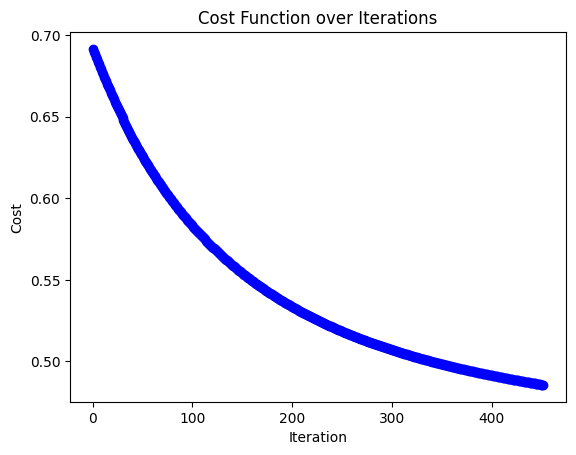

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history, marker='o', color='b')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()